In [1]:
import json
import os
import numpy as np
import pandas as pd
from collections import Counter

INFO_PATH = "/scratch1/NOT_BACKED_UP/cavallarogrp/datasets/processed_dataset/Androzoo_info"

df_info = pd.read_csv(os.path.join(INFO_PATH, "latest.csv"))

In [2]:
FOLDER = "/scratch1/NOT_BACKED_UP/cavallarogrp/datasets/processed_dataset/elsa_data"
test_file = os.path.join(FOLDER, "test_set_round_4.csv")
df_test = pd.read_csv(test_file)
print(df_test.shape)
df_test.head()

(25000, 2)


,sha256,timestamp
0,92cc52fc89f5d6a49e5b875d8aa266d81b9c9d8bf0c3d2...,2021-09-11 08:56:40
1,70cbfdb7113018e3430732bdd839df1b9a026c622c874c...,2021-07-18 08:31:47
2,039a2860b14e3705072733eeaf38125e0f26c38c724957...,2021-09-26 17:10:02
3,0e07833ecd2ea50be50f03d77056335e12eeb654288e97...,2021-07-23 10:11:38
4,e798f83d9a526ae05a1024e770cc336c0a59793e4a3858...,2021-09-27 08:21:26


In [11]:
df_info.head()

,sha256,sha1,md5,dex_date,apk_size,pkg_name,vercode,vt_detection,vt_scan_date,dex_size,markets
0,0000003B455A6C7AF837EF90F2EAFFD856E3B5CF49F5E2...,9C14D537A7ADB4CFC43D291352F73E05E0CCDD4A,3EDFC78AB53521942798AD551027D04F,2016-04-05 17:58:46,10386469,com.zte.bamachaye,121.0,0.0,2016-06-15 15:26:44,4765888,anzhi
1,0000014A634DB98F85038B833A8DFC50D5FB13A464E0B2...,C3EBEC52C9388BF67479FF1385A56C59B3E39E81,0A146750FB447CF3859C9CB659AB04F1,2014-08-20 13:58:10,3537486,com.tanersenel.onlinetvizle,16.0,0.0,2016-11-20 10:26:31,3170096,PlayDrone
2,000001A94F46A0C3DDA514E1F24E675648835BBA5EF3C3...,C0444D784685EFE5F6D9F28683B24B5873E509CB,EC82771AE018B93AD784A1FD2B625216,1980-01-01 00:00:00,52469861,com.firstchoice.myfirstchoice,1206145.0,0.0,2021-03-17 08:02:21,9201656,play.google.com
3,000002B63FAD4B030787F6DE4081DC1E12325026EB7DDA...,DD723B32EDD9F70AADBD66846621967157DF9BD4,985E601C17F0A9346590AE92A5AD664E,1980-01-01 00:00:00,4300370,com.deperu.sitiosarequipa,10000.0,0.0,2017-12-03 06:50:28,4211104,play.google.com
4,000003D3981DC548A772A30D688F424CFB88561A63A2DD...,6AE9F138F7E0C63E5D58CC7E82FB05A50F041637,F4789023733E41EE883208ACBC956020,1980-01-01 00:00:00,12958838,com.safetravels.safetravelsmain,400125.0,0.0,2019-06-25 08:55:42,7813520,play.google.com


In [12]:
test_sha256 = df_test["sha256"].apply(lambda x: x.upper()).values
df_test_info = df_info[df_info["sha256"].isin(test_sha256)][["sha256", "dex_date", "vt_detection"]]

In [13]:
df_test_info['vt_detection'] = df_test_info['vt_detection'].apply(lambda x: float(x.replace("%", "")) if isinstance(x, str) else x)
print(df_test_info['vt_detection'].value_counts())
df_test_info['label'] = 0
df_test_info.loc[df_test_info['vt_detection'] >= 10, 'label'] = 1
print(df_test_info['label'].value_counts())

vt_detection
0.0     22066
1.0       406
10.0      187
11.0      183
12.0      173
15.0      134
13.0      134
16.0      120
14.0      114
2.0       112
17.0      105
18.0       92
9.0        91
7.0        77
19.0       76
6.0        69
34.0       62
8.0        62
22.0       61
35.0       58
3.0        53
21.0       49
5.0        49
36.0       47
20.0       46
4.0        44
33.0       38
23.0       32
37.0       30
24.0       30
25.0       27
31.0       21
32.0       20
28.0       19
26.0       19
38.0       18
27.0       14
30.0       13
29.0       12
39.0       12
40.0        8
41.0        4
42.0        3
43.0        3
44.0        3
45.0        2
47.0        1
48.0        1
Name: count, dtype: int64
label
0    22637
1     2363
Name: count, dtype: int64


In [14]:
df_test_info.to_csv(os.path.join(FOLDER, "test_set_round_4_info.csv"), index=False)

In [3]:
df_train = pd.read_csv(os.path.join(FOLDER, "training_set.csv"))
df_train.head()

,sha256,timestamp,label
0,0175cf5222fd6a221a3e71878d937c724c377885e3ede5...,2017-03-20 05:16:14,0
1,72397cbee4da830d870d85f3fcca41e729772e89b2c5e0...,2017-01-25 22:27:10,0
2,18c152c6e1c09cfa402783758585de1be04345021718a4...,2017-01-12 15:22:09,0
3,b2de9bcca4fa7522a5e9b39b295d1e8c94a1fa5ef55af7...,2017-01-17 09:52:26,0
4,14d08e2d9e0c354ad08ffe13d063d8eddc73e4b56db133...,2017-01-13 22:25:29,0


In [4]:
train_sha256 = df_train["sha256"].apply(lambda x: x.upper()).values
df_train_info = df_info[df_info["sha256"].isin(train_sha256)][["sha256", "dex_date", "vt_detection"]]
df_train_info['vt_detection'] = df_train_info['vt_detection'].apply(lambda x: float(x.replace("%", "")) if isinstance(x, str) else x)
print(df_train_info['vt_detection'].value_counts())

df_train_info.to_csv(os.path.join(FOLDER, "training_set_info.csv"), index=False)

vt_detection
0.0     65650
1.0      1571
18.0      381
13.0      376
16.0      350
14.0      338
21.0      337
17.0      330
19.0      324
15.0      324
12.0      322
11.0      314
10.0      303
22.0      302
20.0      295
26.0      281
23.0      277
24.0      265
29.0      251
25.0      250
30.0      248
28.0      248
31.0      247
27.0      243
2.0       202
32.0      155
9.0        84
7.0        80
3.0        75
6.0        70
8.0        69
33.0       64
5.0        56
34.0       56
4.0        46
36.0       40
37.0       31
38.0       27
39.0       23
35.0       23
40.0       23
42.0       10
43.0       10
41.0        9
49.0        6
45.0        5
47.0        2
46.0        2
50.0        2
48.0        1
44.0        1
51.0        1
Name: count, dtype: int64


In [17]:
df_train_malware = df_train.loc[df_train["label"] == 0]
malware_sha256 = df_train_malware["sha256"].apply(lambda x: x.upper()).values
df_train_malware_info = df_info[df_info["sha256"].isin(malware_sha256)][["sha256", "dex_date", "vt_detection"]]
df_train_malware_info['vt_detection'] = df_train_malware_info['vt_detection'].apply(lambda x: float(x.replace("%", "")) if isinstance(x, str) else x)
print(df_train_malware_info['vt_detection'].value_counts())

vt_detection
0.0     65618
1.0      1555
2.0       195
3.0        62
4.0        22
5.0        18
6.0        13
8.0         7
10.0        4
7.0         4
9.0         2
Name: count, dtype: int64


vt_detection
0.0     65618
1.0      1555
2.0       195
3.0        62
4.0        22
5.0        18
6.0        13
8.0         7
10.0        4
7.0         4
9.0         2
Name: count, dtype: int64


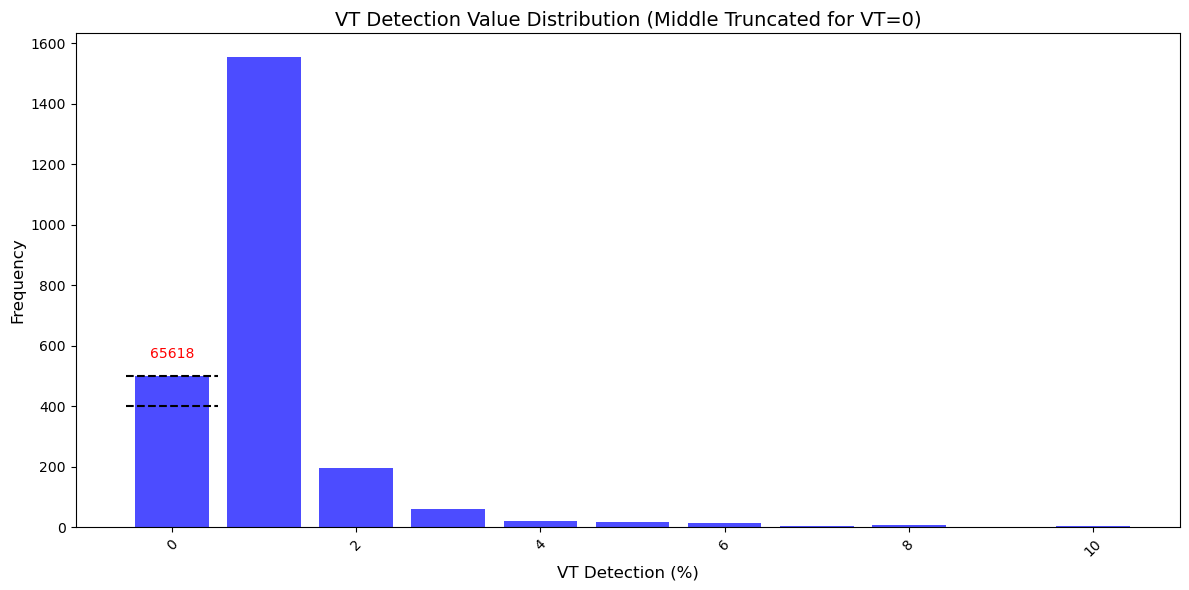

In [18]:
import matplotlib.pyplot as plt
import numpy as np

df_train_malware = df_train.loc[df_train["label"] == 1]
malware_sha256 = df_train_malware["sha256"].apply(lambda x: x.upper()).values
df_train_malware_info = df_info[df_info["sha256"].isin(malware_sha256)][["sha256", "dex_date", "vt_detection"]]
df_train_malware_info['vt_detection'] = df_train_malware_info['vt_detection'].apply(lambda x: float(x.replace("%", "")) if isinstance(x, str) else x)

print(df_train_malware_info['vt_detection'].value_counts())

vt_counts = df_train_malware_info['vt_detection'].value_counts().sort_index()
plt.figure(figsize=(12, 6))

bar_labels = vt_counts.index
bar_values = vt_counts.values

truncate_threshold = 500
vt_0_value = bar_values[0]  

bar_values_adjusted = bar_values.copy()
bar_values_adjusted[0] = truncate_threshold  

plt.bar(bar_labels, bar_values_adjusted, color="blue", alpha=0.7)

if vt_0_value > truncate_threshold:
    plt.text(
        bar_labels[0], truncate_threshold + 50, f"{vt_0_value}", ha="center", va="bottom", fontsize=10, color="red"
    )

plt.plot([bar_labels[0] - 0.5, bar_labels[0] + 0.5], [truncate_threshold, truncate_threshold], color="black", linestyle="--")
plt.plot([bar_labels[0] - 0.5, bar_labels[0] + 0.5], [truncate_threshold - 100, truncate_threshold - 100], color="black", linestyle="--")

plt.xticks(rotation=45)
plt.title("VT Detection Value Distribution (Middle Truncated for VT=0)", fontsize=14)
plt.xlabel("VT Detection (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()


In [40]:
df_train_malware = df_train.loc[df_train["label"] == 1]
malware_sha256 = df_train_malware["sha256"].apply(lambda x: x.upper()).values
df_train_malware_info = df_info[df_info["sha256"].isin(malware_sha256)][["sha256", "dex_date", "vt_detection"]]
df_train_malware_info['vt_detection'] = df_train_malware_info['vt_detection'].apply(lambda x: float(x.replace("%", "")) if isinstance(x, str) else x)
print(df_train_malware_info['vt_detection'].value_counts())

vt_detection
18.0    381
13.0    376
16.0    350
14.0    338
21.0    337
17.0    330
19.0    324
15.0    324
12.0    322
11.0    314
22.0    302
10.0    299
20.0    295
26.0    281
23.0    277
24.0    265
29.0    251
25.0    250
30.0    248
28.0    248
31.0    247
27.0    243
32.0    155
9.0      82
7.0      76
33.0     64
8.0      62
6.0      57
34.0     56
36.0     40
5.0      38
0.0      32
37.0     31
38.0     27
4.0      24
35.0     23
39.0     23
40.0     23
1.0      16
3.0      13
43.0     10
42.0     10
41.0      9
2.0       7
49.0      6
45.0      5
47.0      2
46.0      2
50.0      2
48.0      1
44.0      1
51.0      1
Name: count, dtype: int64
